# **Bank Loan Dataset**

In [33]:
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing, ensemble
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [34]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [38]:
import io
bankloan = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']),sheet_name='Data')

In [39]:
bankloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [40]:
bankloan.drop(labels=['ID','ZIP Code'],axis=1,inplace=True)


In [42]:
bankloan.dropna(inplace=True)
bankloan.drop_duplicates(inplace=True)

In [43]:
bankloan['CCAvg'] = np.round(bankloan['CCAvg'])

In [44]:
rf_model = ensemble.RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

features = bankloan.drop(['Personal Loan'],axis=1)

rf_model.fit (X=features, y=bankloan['Personal Loan'])

print (rf_model.oob_score_)


0.9863645478243432


In [45]:
for feature,imp in zip(features,rf_model.feature_importances_):
  print (feature, imp)


Age 0.050969905710270866
Experience 0.050816537252395474
Income 0.3563973407997899
Family 0.10135240143654357
CCAvg 0.14143139502911237
Education 0.16865403700092207
Mortgage 0.04830163267585888
Securities Account 0.006279224205872482
CD Account 0.055423646808427506
Online 0.009344584465208633
CreditCard 0.011029294615598215


## **Top 3 Features includes:**
1. Income - 35.6 %
2. Education - 16.9 %
3. CCAvg - 14.1 %


In [47]:
predictors = pd.DataFrame ([bankloan['Income'],bankloan['Education'],bankloan['CCAvg']]).T

In [48]:
tree_model = tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10)
tree_model.fit (X=predictors, y=bankloan['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
tree_model.score(X=predictors,y=bankloan['Personal Loan'])

0.970723882093443

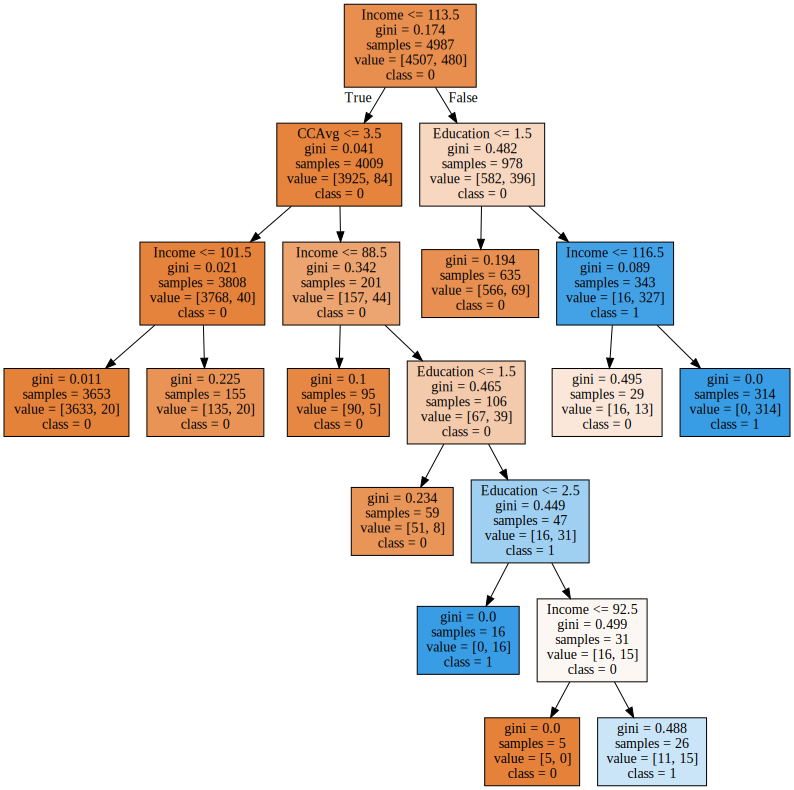

In [50]:
graph = Source(tree.export_graphviz(tree_model, out_file=None
   , feature_names=['Income','Education','CCAvg'], class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

### **Rules**

1. If Income <= 113.5, CCAvg <= 3.5, then Personal Loan is not approved.
2. If Income <= 113.5, CCAvg > 3.5, Income <= 88.5, then Personal Loan is not approved.
3. If Income <= 113.5, CCAvg > 3.5, Income > 88.5 and Education <= 1.5, then Personal Loan is not approved.
4. If Income <= 113.5, CCAvg > 3.5, Income > 88.5 and Education > 1.5 and Education <= 2.5, then Personal Loan is approved.
5. If Income <= 113.5, CCAvg > 3.5, Income > 88.5 and Education > 1.5 and Education > 2.5 and Income <= 92.5, then Personal Loan is not approved.
6. If Income <= 113.5, CCAvg > 3.5, Income > 88.5 and Education > 1.5 and Education > 2.5 and Income > 92.5, then Personal Loan is approved.
7. If Income > 113.5 and Education <= 1.5, then Personal Loan is not approved.
8. If Income > 113.5, Education > 1.5 and Income <= 116.5, then Personal Loan is not approved.
9. If Income > 113.5, Education > 1.5 and Income > 116.5, then Personal Loan is approved.